In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso

In [5]:
USHousehold_dataset = pd.read_csv('USA_Housing.csv')

In [6]:
USHousehold_dataset.shape

(5000, 7)

In [7]:
USHousehold_dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
USHousehold_dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
USHousehold_dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
USHousehold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


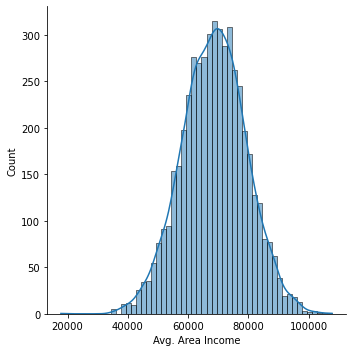

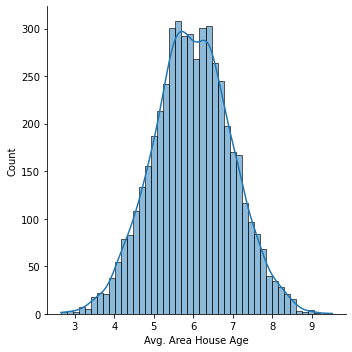

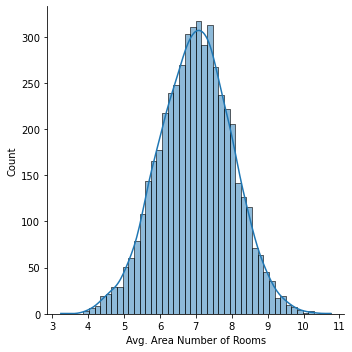

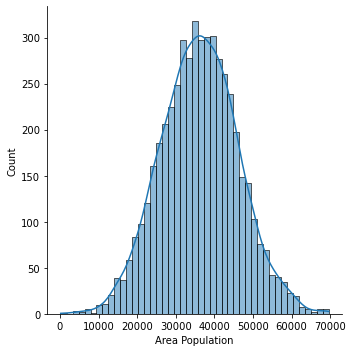

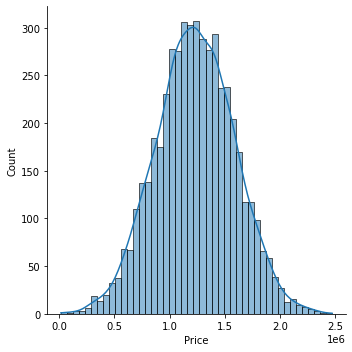

In [11]:
countnious_col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

for i in countnious_col:
    sns.displot(USHousehold_dataset[i], kde=True)

In [12]:
ranges = [0, 500000, 1000000, 1500000, 2000000, np.inf]
label = ['0-500k', '500k-1000k', '1000k-1500k', '1500k-2000k', '2000k+']

USHousehold_dataset['Price group'] = pd.cut(USHousehold_dataset['Price'], bins=ranges, labels=label)

C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


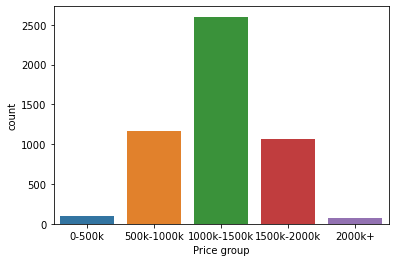

In [13]:
sns.countplot(USHousehold_dataset['Price group'])
plt.show()

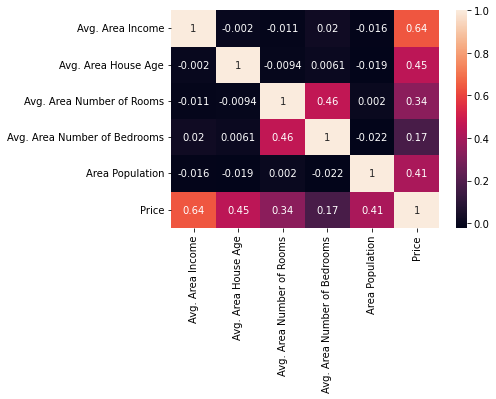

In [14]:
sns.heatmap(USHousehold_dataset.corr(), annot=True)
plt.show()

In [15]:
ranges = [0, 20000, 40000, 60000, 80000, np.inf]
label = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+']

pd.cut(USHousehold_dataset['Avg. Area Income'], bins=ranges, labels=label).head()

0    60000-80000
1    60000-80000
2    60000-80000
3    60000-80000
4    40000-60000
Name: Avg. Area Income, dtype: category
Categories (5, object): ['0-20000' < '20000-40000' < '40000-60000' < '60000-80000' < '80000+']

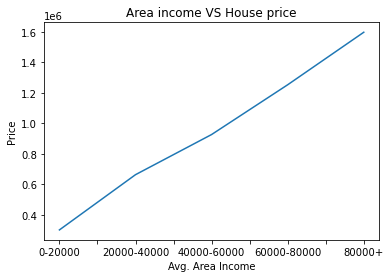

In [16]:
USHousehold_dataset.groupby(pd.cut(USHousehold_dataset['Avg. Area Income'], bins=ranges, labels=label))['Price'].mean().plot()
plt.title('Area income VS House price')
plt.ylabel('Price')
plt.show()

In [17]:
USHousehold_dataset['Avg. Area House Age'].describe()

count    5000.000000
mean        5.977222
std         0.991456
min         2.644304
25%         5.322283
50%         5.970429
75%         6.650808
max         9.519088
Name: Avg. Area House Age, dtype: float64

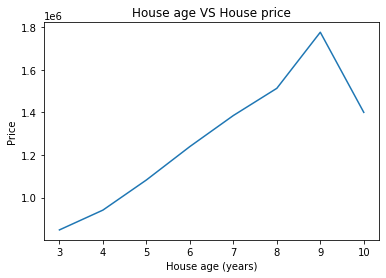

In [18]:
USHousehold_dataset.groupby(round(USHousehold_dataset['Avg. Area House Age']))['Price'].mean().plot()
plt.title('House age VS House price')
plt.xlabel('House age (years)')
plt.ylabel('Price')
plt.show()

C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


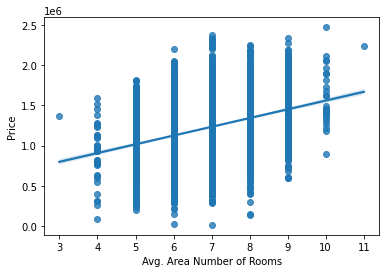

In [19]:
sns.regplot(round(USHousehold_dataset['Avg. Area Number of Rooms']), round(USHousehold_dataset['Price']))
plt.show()

In [20]:
display(USHousehold_dataset.groupby(round(USHousehold_dataset['Avg. Area Number of Rooms']))['Price'].mean())

Avg. Area Number of Rooms
3.0     1.365081e+06
4.0     9.020765e+05
5.0     1.020620e+06
6.0     1.124506e+06
7.0     1.234440e+06
8.0     1.334549e+06
9.0     1.464372e+06
10.0    1.591249e+06
11.0    2.235295e+06
Name: Price, dtype: float64

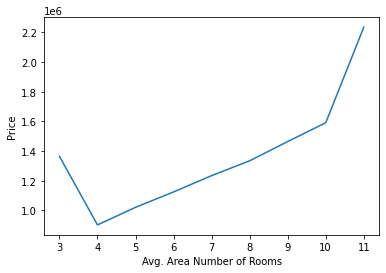

In [21]:
USHousehold_dataset.groupby(round(USHousehold_dataset['Avg. Area Number of Rooms']))['Price'].mean().plot()
plt.ylabel('Price')
plt.show()

C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


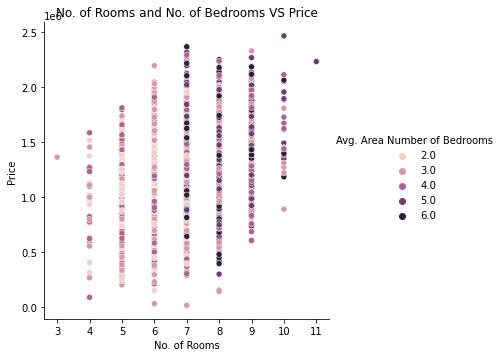

In [22]:
sns.relplot(round(USHousehold_dataset['Avg. Area Number of Rooms']), round(USHousehold_dataset['Price']), hue=round(USHousehold_dataset['Avg. Area Number of Bedrooms']))
plt.title('No. of Rooms and No. of Bedrooms VS Price')
plt.xlabel('No. of Rooms')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='Area Population', ylabel='Price'>

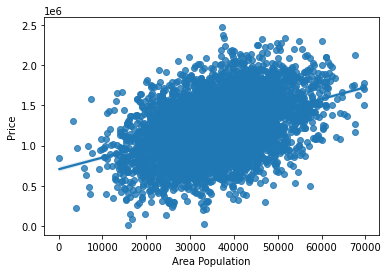

In [23]:
sns.regplot(x='Area Population', y='Price', data=USHousehold_dataset)

In [24]:
ranges = [0, 10000, 20000, 30000, 40000, 50000, 60000, np.inf]
label = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k+']

USHousehold_dataset['Population group'] = pd.cut(USHousehold_dataset['Area Population'], bins=ranges, labels=label)

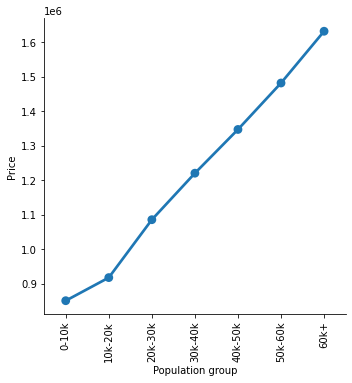

In [25]:
sns.catplot(x='Population group', y='Price', kind='point', ci=None, data=USHousehold_dataset)
plt.xticks(rotation=90)
plt.show()

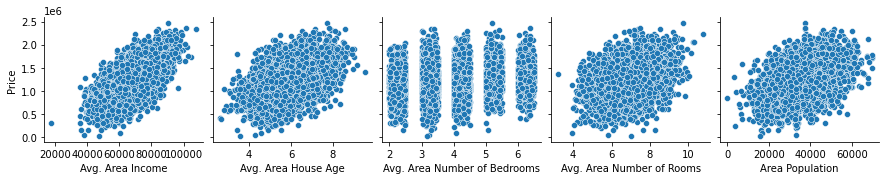

In [26]:
x_col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms', 'Area Population']
y_col = ['Price']

sns.pairplot(USHousehold_dataset, 
            x_vars= x_col,
            y_vars= y_col)
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in USHousehold_dataset.columns:
    # Compare if the dtype is object
    if USHousehold_dataset[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        USHousehold_dataset[col]=le.fit_transform(USHousehold_dataset[col])

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = USHousehold_dataset.drop(['Price', 'Price group', 'Population group', 'Address'], axis=1)
y = USHousehold_dataset['Price']

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [31]:
print("Train score:")
print(lin_reg.score(X_train, y_train))

print("Test score:")
print(lin_reg.score(X_test, y_test))

Train score:
0.9153850272666253
Test score:
0.9217813719018445


In [32]:
coeff_USHousehold_dataset = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_USHousehold_dataset.sort_values(by='Coefficient', ascending=False)

,Coefficient
Avg. Area Income,226764.488869
Avg. Area House Age,163592.174358
Area Population,152025.054085
Avg. Area Number of Rooms,123094.837933
Avg. Area Number of Bedrooms,1594.917329


C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


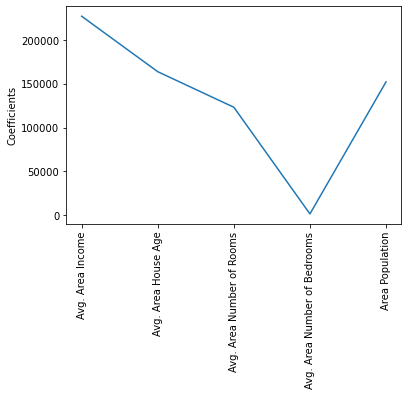

In [33]:
names = USHousehold_dataset.drop(['Price', 'Price group', 'Population group', 'Address'], axis=1).columns
lr_coef = lin_reg.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), lr_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [35]:
X = USHousehold_dataset.drop(['Price', 'Price group', 'Population group', 'Address','Avg. Area Number of Bedrooms'], axis=1)
y = USHousehold_dataset['Price']

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

print("Train score:")
print(lin_reg.score(X_train, y_train))

print("Test score:")
print(lin_reg.score(X_test, y_test))

Train score:
0.9219510473406712
Test score:
0.9112178064422304


C:\Users\Krish Sanghvi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
